# Comparing the lengths of results from Liouville, FWD, and BWD generators

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## loading FWD data (in format from Lample and Charton paper)

In [5]:
fwd = open("Data/prim_FWD.test")
fwd = fwd.read().split('\n')

In [6]:
fwd = [s[s.find("'")+2:].split('\t') for s in fwd]

In [8]:
# Format the data into integrand, integral pairs
all_fwd = []
for expr in fwd:
    line = []
    for s in expr:
        test = s.split()
        line.append(test)
    all_fwd.append(line)

In [9]:
all_fwd = [item for item in all_fwd if len(item)==2]

In [10]:
# calculate number of tokens in integrand, integral 
fwd = [[len(item[0]), len(item[1])] for item in all_fwd]

## BWD

### Same format as FWD

In [15]:
bwd = open("Data/prim_BWD.test")
bwd = bwd.read().split('\n')
bwd = [s[s.find("'")+2:].split('\t') for s in bwd]

In [16]:
all_bwd = []
for expr in bwd:
    line = []
    for s in expr:
        test = s.split()
        line.append(test)
    all_bwd.append(line)

In [17]:
all_bwd = [item for item in all_bwd if len(item)==2]

In [18]:
bwd = [[len(item[0]), len(item[1])] for item in all_bwd]

# LIOUVILLE

In [36]:
import json
with open('Data/liouville.json', 'r') as file:
    lio = json.load(file)

In [37]:
# Discard the prefix notation, only useful for figure 2
lio = [data[0] for data in lio]

In [38]:
# Calculate length of all expressions
lio = [[len(data[0]), len(data[1])] for data in lio]

In [39]:
df1 = pd.DataFrame(fwd, columns=['integrand', 'integral'])
df1['dataset'] = 'FWD'

df2 = pd.DataFrame(bwd, columns=['integrand', 'integral'])
df2['dataset'] = 'BWD'

df3 = pd.DataFrame(lio, columns=['integrand', 'integral'])
df3['dataset'] = 'Liouville'

In [41]:
df3.tail()

,integrand,integral,dataset
9995,105,92,Liouville
9996,138,116,Liouville
9997,70,99,Liouville
9998,138,110,Liouville
9999,82,91,Liouville


In [42]:
# Combine all DataFrames into one
df = pd.concat([df1, df2, df3])

In [43]:
df

,integrand,integral,dataset
0,6,21,FWD
1,4,10,FWD
2,6,21,FWD
3,7,7,FWD
4,6,13,FWD
...,...,...,...
9995,105,92,Liouville
9996,138,116,Liouville
9997,70,99,Liouville
9998,138,110,Liouville


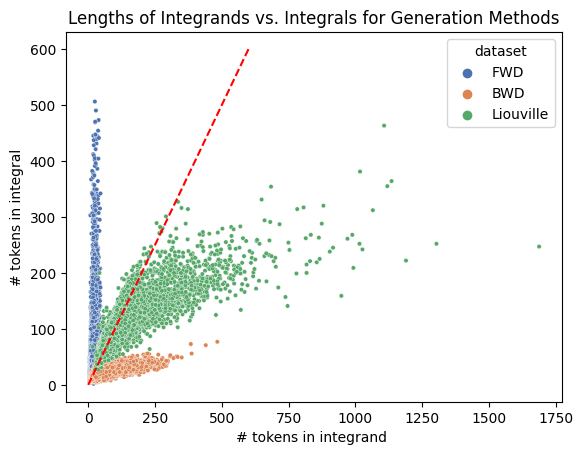

In [44]:
# Create a scatter plot using Seaborn with different colors for each dataset
ax = sns.scatterplot(data=df, x='integrand', y='integral', hue='dataset', palette='deep', s=10)
ax.set(xlabel='# tokens in integrand ', ylabel='# tokens in integral')
# Add a line at y = x
x_vals = np.linspace(0, 600, 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--')
plt.title("Lengths of Integrands vs. Integrals for Generation Methods")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


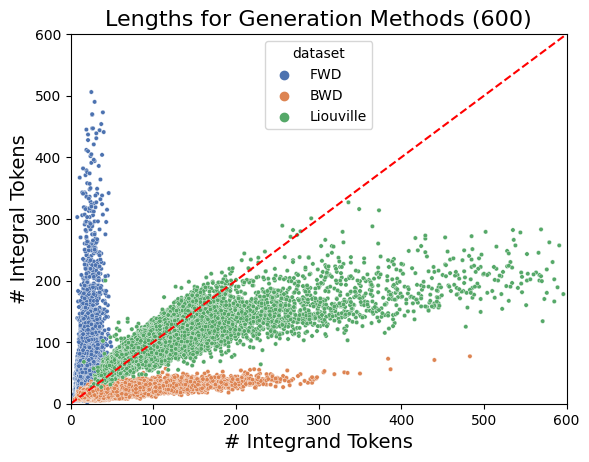

In [46]:
# Create a scatter plot using Seaborn with different colors for each dataset
ax = sns.scatterplot(data=df, x='integrand', y='integral', hue='dataset', palette='deep', s=10)
plt.xlabel('# Integrand Tokens', fontsize=14)
plt.ylabel('# Integral Tokens', fontsize=14)
plt.title("Lengths for Generation Methods (600)", fontsize=16)
# Add a line at y = x
x_vals = np.linspace(0, 600, 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--')
# Set the x-axis and y-axis limits
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.savefig('Figures/lengths_600.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


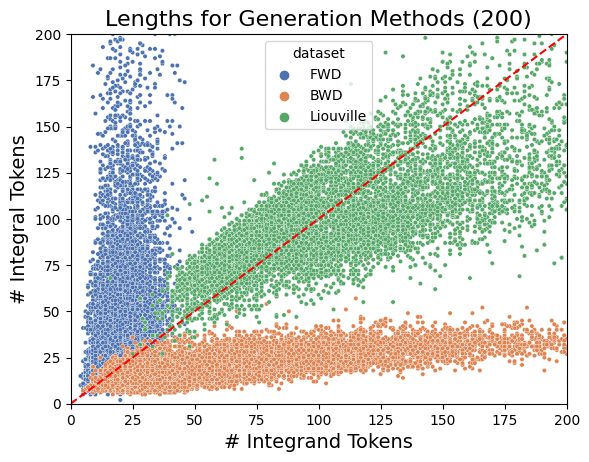

In [47]:
# Create a scatter plot using Seaborn with different colors for each dataset
ax = sns.scatterplot(data=df, x='integrand', y='integral', hue='dataset', palette='deep', s=10)
plt.xlabel('# Integrand Tokens', fontsize=14)
plt.ylabel('# Integral Tokens', fontsize=14)
plt.title("Lengths for Generation Methods (200)", fontsize=16)
# Add a line at y = x
x_vals = np.linspace(0, 600, 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--')
# Set the x-axis and y-axis limits
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.savefig('Figures/lengths_200.eps', format='eps')
plt.show()

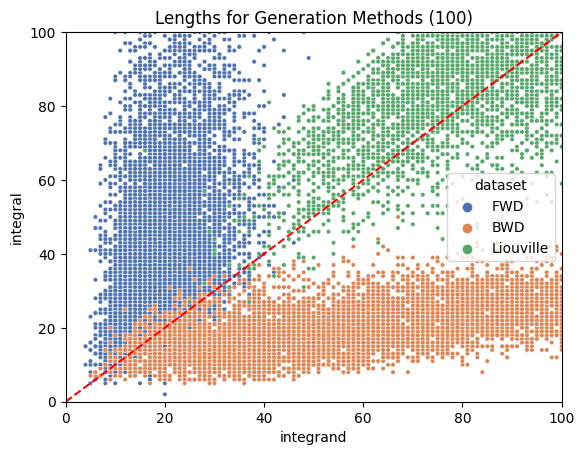

In [48]:
# Create a scatter plot using Seaborn with different colors for each dataset
sns.scatterplot(data=df, x='integrand', y='integral', hue='dataset', palette='deep', s=10)
# Add a line at y = x
x_vals = np.linspace(0, 600, 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--')
# Set the x-axis and y-axis limits
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title("Lengths for Generation Methods (100)")
plt.show()